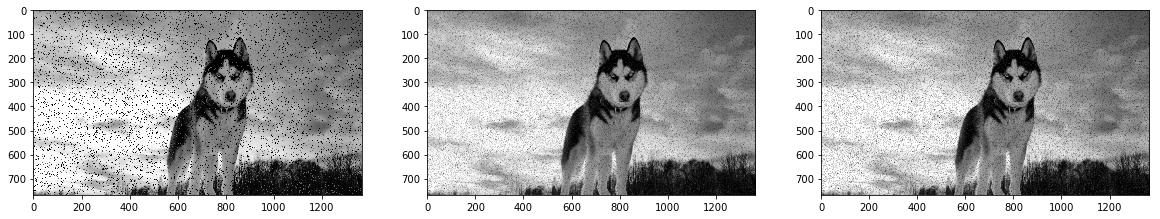

In [8]:
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import random
import cv2
%matplotlib inline
dog = img.imread('./dogg.jpg')
greyDog =color.rgb2gray(dog)
fig = plt.figure(figsize=(20,20))

def sp_noise(image,prob):

# Add salt and pepper noise to image
# prob: Probability of the noise

    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 100
            else:
                output[i][j] = image[i][j]
    return output

imagee = cv2.imread('./dogg.jpg',0) # Only for grayscale image
image =color.rgb2gray(imagee)

noise_img = sp_noise(image,0.05)
cv2.imwrite('sp_noise.jpg', noise_img)

k1 = np.array([[1 / 16,2 / 16,1 / 16],[2 / 16,4 / 16,2 / 16],[1 / 16,2 / 16,1 / 16]])
flt1 = ndimage.convolve(noise_img, k1, mode='nearest', cval=0.0)

k2 = np.array([[0 / 5, 1 / 5, 0 / 5], [1 / 5, 1 / 5, 1 / 5],[0 / 5, 1 / 5, 0 / 5]])
flt2 = ndimage.convolve(noise_img, k2, mode='nearest', cval=0.0)

k3 = np.array([[-1, -2, -1], [-2, 12, -2],[-1, -2, -1]])
flt3 = ndimage.convolve(noise_img, k3, mode='nearest', cval=0.0)


plt.subplot(131)
plt.imshow(noise_img,cmap='gray')

plt.subplot(132)
plt.imshow(flt1,cmap='gray')

plt.subplot(133)
plt.imshow(flt2,cmap='gray')


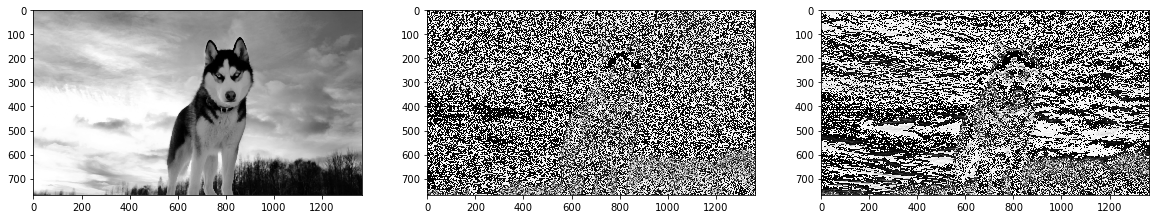

In [1]:
from scipy import ndimage
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import random
import cv2

from scipy import ndimage as nimg
import numpy as np
from PIL import Image
from skimage import color
from skimage import io
from matplotlib import pyplot as plt

from skimage import data
from skimage.morphology import disk
from skimage.filters.rank import median


%matplotlib inline
dog = img.imread('./dogg.jpg')


greyDog =color.rgb2gray(dog)
fig = plt.figure(figsize=(20,20))

laplacian64 = cv2.Laplacian(greyDog, cv2.CV_64F)
sobelx64 = cv2.Sobel(greyDog,cv2.CV_64F,1,0,ksize=5)
sobely64 = cv2.Sobel(greyDog,cv2.CV_64F,0,1,ksize=5)
 
laplacian = np.uint8(np.absolute(laplacian64))
sobelx = np.uint8(np.absolute(sobelx64))
sobely = np.uint8(np.absolute(sobely64))





def sp_noise(image,prob):

# Add salt and pepper noise to image
# prob: Probability of the noise

    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 100
            else:
                output[i][j] = image[i][j]
    return output

image = cv2.imread('./dogg.jpg',0) # Only for grayscale image
noise_img = sp_noise(image, -1)
cv2.imwrite('sp_noise.jpg', noise_img)

flt3 = median(noise_img, disk(3))

k4 = np.array([[-1, -2, -1], [-2, 12, -2],[-1, -2, -1]])
flt4 = ndimage.convolve(noise_img, k4, mode='nearest', cval=0.0)

k5 = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
flt5 = ndimage.convolve(noise_img, k5, mode='nearest', cval=0.0)

plt.subplot(131)
plt.imshow(flt3,cmap='gray')

plt.subplot(132)
plt.imshow(flt4,cmap='gray')

plt.subplot(133)
plt.imshow(flt5,cmap='gray')